<h3> DATA ANALYSIS - Beats</h3>

1) Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

2) Specify the Parameters

In [2]:
district=3.0  #police district
delta=.3  #distance threshold
tau=30  #time threshold
beat=324 #beat

3) Import the Chicago shotspotter data and filter for the specified district.

In [3]:
shot_data_raw = pd.read_csv('Shotspotter_data.csv')
shot_data_raw=shot_data_raw[shot_data_raw["DISTRICT"]==district]
for i in shot_data_raw.index:
    x=shot_data_raw.loc[i,"DATE"]
    x1=x.split(' ')
    x2=x1[0].split('/')
    shot_data_raw.loc[i,"time"]=x1[1]
    shot_data_raw.loc[i,'MONTH'] =int(x2[0])
    shot_data_raw.loc[i,"day"]=x2[1]
    shot_data_raw.loc[i,"YEAR"]=int(x2[2])
shot_data_raw=shot_data_raw.reset_index(drop=True)
shot_data_raw.head(5)

,DATE,BLOCK,ZIP_CODE,WARD,COMMUNITY_AREA,AREA,DISTRICT,BEAT,STREET_OUTREACH_ORGANIZATION,UNIQUE_ID,...,INCIDENT_TYPE_DESCRIPTION,ROUNDS,ILLINOIS_HOUSE_DISTRICT,ILLINOIS_SENATE_DISTRICT,LATITUDE,LONGITUDE,LOCATION,time,day,YEAR
0,1/29/2018 15:27,NaN,60637.0,20.0,GREATER GRAND CROSSING,1.0,3.0,322.0,Acclivus Greater Grand Crossing,SST-1628,...,SINGLE GUNSHOT,1,32.0,16.0,41.772790,-87.618193,POINT (-87.61819334612 41.772790345858),15:27,29,2018.0
1,1/30/2018 18:43,7000 S STONY ISLAND,60649.0,5.0,SOUTH SHORE,1.0,3.0,332.0,Claretian Associates South Shore,SST-1662,...,SINGLE GUNSHOT,1,26.0,13.0,41.766797,-87.585398,POINT (-87.58539765388 41.766797345858),18:43,30,2018.0
2,1/31/2018 1:45,NaN,60649.0,5.0,SOUTH SHORE,1.0,3.0,332.0,Claretian Associates South Shore,SST-1670,...,GUNSHOT OR FIRECRACKER,1,25.0,13.0,41.773760,-87.581308,POINT (-87.581307547471 41.773759668947),1:45,31,2018.0
3,2/1/2018 17:51,NaN,60637.0,20.0,WOODLAWN,1.0,3.0,312.0,Project H.O.O.D. Woodlawn,SST-1715,...,GUNSHOT OR FIRECRACKER,12,5.0,3.0,41.778602,-87.609718,POINT (-87.609718 41.7786015),17:51,1,2018.0
4,2/1/2018 19:29,6600 S LANGLEY AVE,60637.0,20.0,WOODLAWN,1.0,3.0,321.0,None,SST-1720,...,MULTIPLE GUNSHOTS,7,5.0,3.0,41.773794,-87.608251,POINT (-87.608250547471 41.773793668947),19:29,1,2018.0


3) Streamline the dataframe.

In [4]:
shot_data_raw=shot_data_raw[["DATE","BEAT", "YEAR","MONTH","LATITUDE","LONGITUDE","LOCATION"]]
shot_data_raw.head(5)

,DATE,BEAT,YEAR,MONTH,LATITUDE,LONGITUDE,LOCATION
0,1/29/2018 15:27,322.0,2018.0,1,41.772790,-87.618193,POINT (-87.61819334612 41.772790345858)
1,1/30/2018 18:43,332.0,2018.0,1,41.766797,-87.585398,POINT (-87.58539765388 41.766797345858)
2,1/31/2018 1:45,332.0,2018.0,1,41.773760,-87.581308,POINT (-87.581307547471 41.773759668947)
3,2/1/2018 17:51,312.0,2018.0,2,41.778602,-87.609718,POINT (-87.609718 41.7786015)
4,2/1/2018 19:29,321.0,2018.0,2,41.773794,-87.608251,POINT (-87.608250547471 41.773793668947)


4) Find the dimensions of the data

In [5]:
shot_data_raw.head()

,DATE,BEAT,YEAR,MONTH,LATITUDE,LONGITUDE,LOCATION
0,1/29/2018 15:27,322.0,2018.0,1,41.772790,-87.618193,POINT (-87.61819334612 41.772790345858)
1,1/30/2018 18:43,332.0,2018.0,1,41.766797,-87.585398,POINT (-87.58539765388 41.766797345858)
2,1/31/2018 1:45,332.0,2018.0,1,41.773760,-87.581308,POINT (-87.581307547471 41.773759668947)
3,2/1/2018 17:51,312.0,2018.0,2,41.778602,-87.609718,POINT (-87.609718 41.7786015)
4,2/1/2018 19:29,321.0,2018.0,2,41.773794,-87.608251,POINT (-87.608250547471 41.773793668947)


5) Read in the shooting event data.

In [6]:
hom_data_raw = pd.read_csv('Shooting_data.csv')
for i in hom_data_raw.index:
    x=hom_data_raw.loc[i,"Date"]
    x1=x.split(' ')
    x2=x1[0].split('/')
    hom_data_raw.loc[i,'MONTH'] =int(x2[0])
hom_data_raw.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'MONTH'],
      dtype='object')

6) Filter the shooting data for D3 and create a column "spotted" to indicate which events are linked to shotspotter incidents (note that there might be several linked shooting and shotspotter incidents based on the threshold values).

In [7]:
hom_data_raw= hom_data_raw[['Date','Beat','Year','MONTH','District','Latitude', 'Longitude','Location']]
hom_data_raw= hom_data_raw[hom_data_raw['District'] == int(district)]
hom_data_raw= hom_data_raw.reset_index(drop=True)
hom_data_raw['spotted'] = 0
hom_data_raw.columns=["DATE", "BEAT", "YEAR","MONTH","DISTRICT","LATITUDE","LONGITUDE","LOCATION","spotted"]
hom_data_raw.head(2)

,DATE,BEAT,YEAR,MONTH,DISTRICT,LATITUDE,LONGITUDE,LOCATION,spotted
0,1/2/2018 14:55,312,2018,1.0,3,41.777465,-87.617264,"(41.777464689, -87.617264087)",0
1,1/6/2018 11:12,331,2018,1.0,3,41.769885,-87.568652,"(41.769884528, -87.568652033)",0


In [8]:
hom_data_raw.head()

,DATE,BEAT,YEAR,MONTH,DISTRICT,LATITUDE,LONGITUDE,LOCATION,spotted
0,1/2/2018 14:55,312,2018,1.0,3,41.777465,-87.617264,"(41.777464689, -87.617264087)",0
1,1/6/2018 11:12,331,2018,1.0,3,41.769885,-87.568652,"(41.769884528, -87.568652033)",0
2,1/6/2018 13:00,321,2018,1.0,3,41.772273,-87.609385,"(41.772272507, -87.609385104)",0
3,2/2/2018 0:04,323,2018,2.0,3,41.761450,-87.623211,"(41.761450225, -87.623211368)",0
4,2/13/2018 0:57,322,2018,2.0,3,41.769326,-87.616119,"(41.769326209, -87.616119242)",0


Beats of District 3: 

311
312
313
314
321
322
323
324
331
332
333
334

The following code allows us to obtain linkage ratios and make a chart for each of the beats. There are 4 places indicated with comments "#BEAT CHANGE HERE" where you can change which beat you are working with to obtain the graph for a specific beat. 

In [9]:
!!pip install geopy
from geopy import distance
import datetime
import re

In [10]:
pt1 = [hom_data_raw.loc[3,"LATITUDE"],hom_data_raw.loc[3,"LONGITUDE"]]
pt2 = [shot_data_raw.loc[1,"LATITUDE"],shot_data_raw.loc[1,"LONGITUDE"]]
print("Distance between events is ", distance.distance(pt1, pt2).km, ' km')
strdate1 = hom_data_raw.loc[3,"DATE"]
strdate2 = shot_data_raw.loc[1,"DATE"]
date1 = datetime.datetime.strptime(strdate1, "%m/%d/%Y %H:%M")
date2 = datetime.datetime.strptime(strdate2, "%m/%d/%Y %H:%M")
dt = date1-date2
print(date1)
print(date2)
print("Time between events is ", int(dt.total_seconds()/60))

Distance between events is  3.2000326883527346  km
2018-02-02 00:04:00
2018-01-30 18:43:00
Time between events is  3201


In [11]:
def LD(hom_data,shot_data,year,month,delta,tau,beat):
    #install libraries
    from geopy import distance
    import datetime
    #get the threshold values
    delta = delta
    tau = tau
    hom_data = hom_data[hom_data["YEAR"]==year]
    shot_data = shot_data[shot_data["YEAR"]==year]
    hom_data = hom_data[hom_data["MONTH"]==month]
    shot_data = shot_data[shot_data["MONTH"]==month]
    hom_data = hom_data[hom_data["BEAT"]==beat]
    shot_data = shot_data[shot_data["BEAT"]==beat]
    shot_data = shot_data.reset_index(drop = True)
    hom_data = hom_data.reset_index(drop=True)
    #define the function to determine linkage of shotspotter and shooting incidents based on the threshold values
    def linked(P, T, delta, tau):
        for k in range(P.shape[0]):
            for q in range(P.shape[1]):
                if P[k][q] < delta and T[k][q] < tau and T[k][q] >= 0:
                    hom_data.loc[k, 'spotted'] = hom_data.loc[k,'spotted']+ 1
    #Create the P and T matrices
    P = np.zeros((hom_data.shape[0], shot_data.shape[0]))
    T = np.zeros((hom_data.shape[0], shot_data.shape[0]))
    for i in hom_data.index:
        for j in shot_data.index:
            location1 = hom_data.loc[i,"LOCATION"]
            location2 = shot_data.loc[j,"LOCATION"]
            a1 = location1.split(' ')
            a2 = location2.split(' ')
            #pt1 = [float(re.sub('[^0-9.-]','', a1[2])),float(re.sub('[^0-9.-]','', a1[1]))]
            #pt2 = [float(re.sub('[^0-9.-]','', a2[2])),float(re.sub('[^0-9.-]','', a2[1]))]
            pt1 = [hom_data.loc[i,"LATITUDE"],hom_data.loc[i,"LONGITUDE"]]
            pt2 = [shot_data.loc[j,"LATITUDE"],shot_data.loc[j,"LONGITUDE"]]
            P[i][j] = distance.distance(pt1, pt2).km
            strdate1 = hom_data.loc[i,"DATE"]
            strdate2 = shot_data.loc[j,"DATE"]
            date1 = datetime.datetime.strptime(strdate1, "%m/%d/%Y %H:%M")
            date2 = datetime.datetime.strptime(strdate2, "%m/%d/%Y %H:%M")
            dt = date1-date2
            T[i][j] = int(dt.total_seconds() / 60)
    #Apply the function linked to the P and T matrices
    linked(P,T,delta,tau)
    #return the linking distribution
    return hom_data['spotted'].value_counts()

In [12]:
def linkageratio(year,delta,tau,hom_data_raw,shot_data_raw,beat):
    tot= [[]] * 12
    linked = [[]] * 12
    ratio = [[]]*12
    L = [[]]*12
    for mo in np.arange(0,12,1):
        L[mo]=LD(hom_data_raw,shot_data_raw,year,mo+1,delta,tau,beat)
        tot[mo] = np.sum(L[mo])
        if 0 in L[mo].index:
            linked[mo] = tot[mo]-L[mo][0]
        else:
            linked[mo] = tot[mo]
        if tot[mo]>0:
            ratio[mo] = linked[mo]/tot[mo]
        else:
            ratio[mo]=0
    return [ratio,linked,tot]

In [13]:
#use to store specified year linkage ratios. linked shooting incidents, and total shooting incidents
yrtot= [[]] * 4
yrlinked=[[]]*4
yrratio=[[]]*4

In [14]:
linkageratio(2020,delta,tau,hom_data_raw,shot_data_raw,beat)

[[0,
  0,
  0,
  0,
  0.5,
  0.6666666666666666,
  1.0,
  0,
  0.0,
  0,
  0.0,
  0.3333333333333333],
 [0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 2, 3, 1, 0, 1, 0, 1, 3]]

In [15]:
for i in np.arange(0,4,1):
    [yrratio[i],yrlinked[i],yrtot[i]]=linkageratio(2018+i,delta,tau,hom_data_raw,shot_data_raw,beat)

In [16]:
x = np.arange(0, 12)
avgtot = np.add(np.add(yrtot[0],yrtot[1],),yrtot[2])/3
avglinked = np.add(np.add(yrlinked[0],yrlinked[1],),yrlinked[2])/3
print(avglinked)

[0.         0.33333333 0.         0.33333333 0.66666667 0.66666667
 0.66666667 0.66666667 0.33333333 0.         0.         0.66666667]


<h3>Beat Plots </h3>


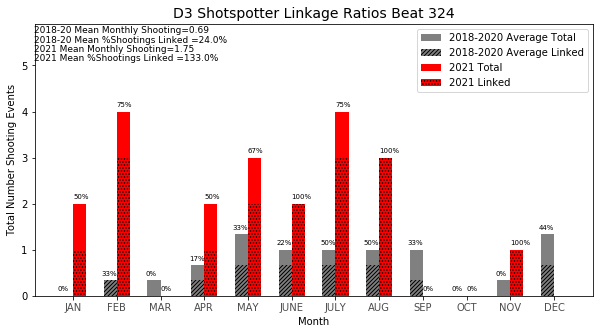

In [17]:
plt.rc('font', size=10)
plt.figure(figsize=[10,5])
plt.bar(x-.15,avgtot,width = .3,color = 'grey')
plt.bar(x-.15,avglinked,width = .3,color = 'grey',hatch="//////")
plt.bar(x+.15,yrtot[3],width = .3,color = 'red')
plt.bar(x+.15,yrlinked[3],width = .3,color = 'red',hatch = "....")
#Plot 2018-2020 average
ratio= [(g + h+i) / 3 for g, h,i in zip(yrratio[0],yrratio[1],yrratio[2])]
total= [(g + h+i) / 3 for g, h,i in zip(yrtot[0],yrtot[1],yrtot[2])]
for j in np.arange(0,12,1):        
    plt.text(j-.35,total[j]+.1,str(int(round(ratio[j]*100,0)))+'%',size = 7)
for j in np.arange(0,11,1):
        plt.text(j,yrtot[3][j]+.1,str(int(round(yrratio[3][j]*100,0)))+'%',size = 7)

classes=["JAN","FEB","MAR","APR","MAY","JUNE","JULY","AUG","SEP","OCT","NOV","DEC"]
ps = np.arange(len(classes))
plt.xticks(ps, classes, alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Total Number Shooting Events')
plt.ylim(0,5.9)
plt.title("D3 Shotspotter Linkage Ratios Beat "+ str(beat),size=14) 
dely=0
if beat == 313:
    dely=1.75

plt.legend(['2018-2020 Average Total','2018-2020 Average Linked','2021 Total','2021 Linked'])
plt.text(-.9,5.7-dely,'2018-20 Mean Monthly Shooting='+str(round(np.mean(total),2)),size =9)
plt.text(-.9,5.5-dely,'2018-20 Mean %Shootings Linked ='+str(100*round(np.mean(ratio),2))+'%',size = 9)
plt.text(-.9,5.3-dely,'2021 Mean Monthly Shooting='+str(round(np.mean(yrtot[3]),2)),size =9)
plt.text(-.9,5.1-dely,'2021 Mean %Shootings Linked ='+str(100*round(np.mean(yrlinked[3]),2))+'%',size = 9)
 
plt.savefig("D3Beat"+str(beat)+".png") 